In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from pymongo import MongoClient

from src.config_tickets import ticket_lst
from src.scraping import WebScraping
from src.settings import HOST
from src.query_data import QueryData

In [3]:
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

from ipywidgets import interactive, widgets, RadioButtons, ToggleButton, Select, FloatSlider, FloatRangeSlider, IntSlider, fixed

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [4]:
def connect_2_dbServer():
    mongoClient = MongoClient(HOST)
    return mongoClient

In [5]:
client = connect_2_dbServer()
query = QueryData(client)

In [6]:
df_ticket = query.get_list_ticket()
print(df_ticket)

      ticket                                               name
0      VNI30                                              VN 30
1254   HNX30                                             HNX 30
1578     ACB                               Asia Commercial Bank
2833     VCS                        Advanced Compound Stone JSC
4088     BVS                         Baoviet Securities Company
5339     BCC                                     Bim Son Cement
6593     NDN                                     DANANG HOUSING
7848     VTV                     Materials Transport Cement JSC
8948     PGS                      Petrovietnam Southern Gas JSC
10176    CTD                             Cotec Construction JSC
11417    DHG                             DHG Pharmaceutical JSC
12670    ROS                            Faros Construction Corp
13342    FPT                                           FPT Corp
15823    GMD                                      Gemadept Corp
17076    CII     Ho Chi Minh City Infras

In [7]:
start = datetime(2010,1,1)
end = datetime(2019,1,1)
lst_ticket = list(df_ticket['name'][2:5])

df = query.get_historical_data(lst_ticket, start=start)
closed_price = pd.DataFrame()
for ticket in lst_ticket:
    closed_price[ticket] = df[df.name == ticket]['close']
closed_price.tail()

,Asia Commercial Bank,Advanced Compound Stone JSC,Baoviet Securities Company
date,,,
2014-05-15,10603.00000,2212.00000,9792.00000
2014-05-14,10534.00000,2335.00000,9792.00000
2014-05-13,10328.00000,2253.00000,8928.00000
2014-05-12,10259.00000,2417.00000,9504.00000
2014-05-09,10588.00000,2683.00000,10464.00000


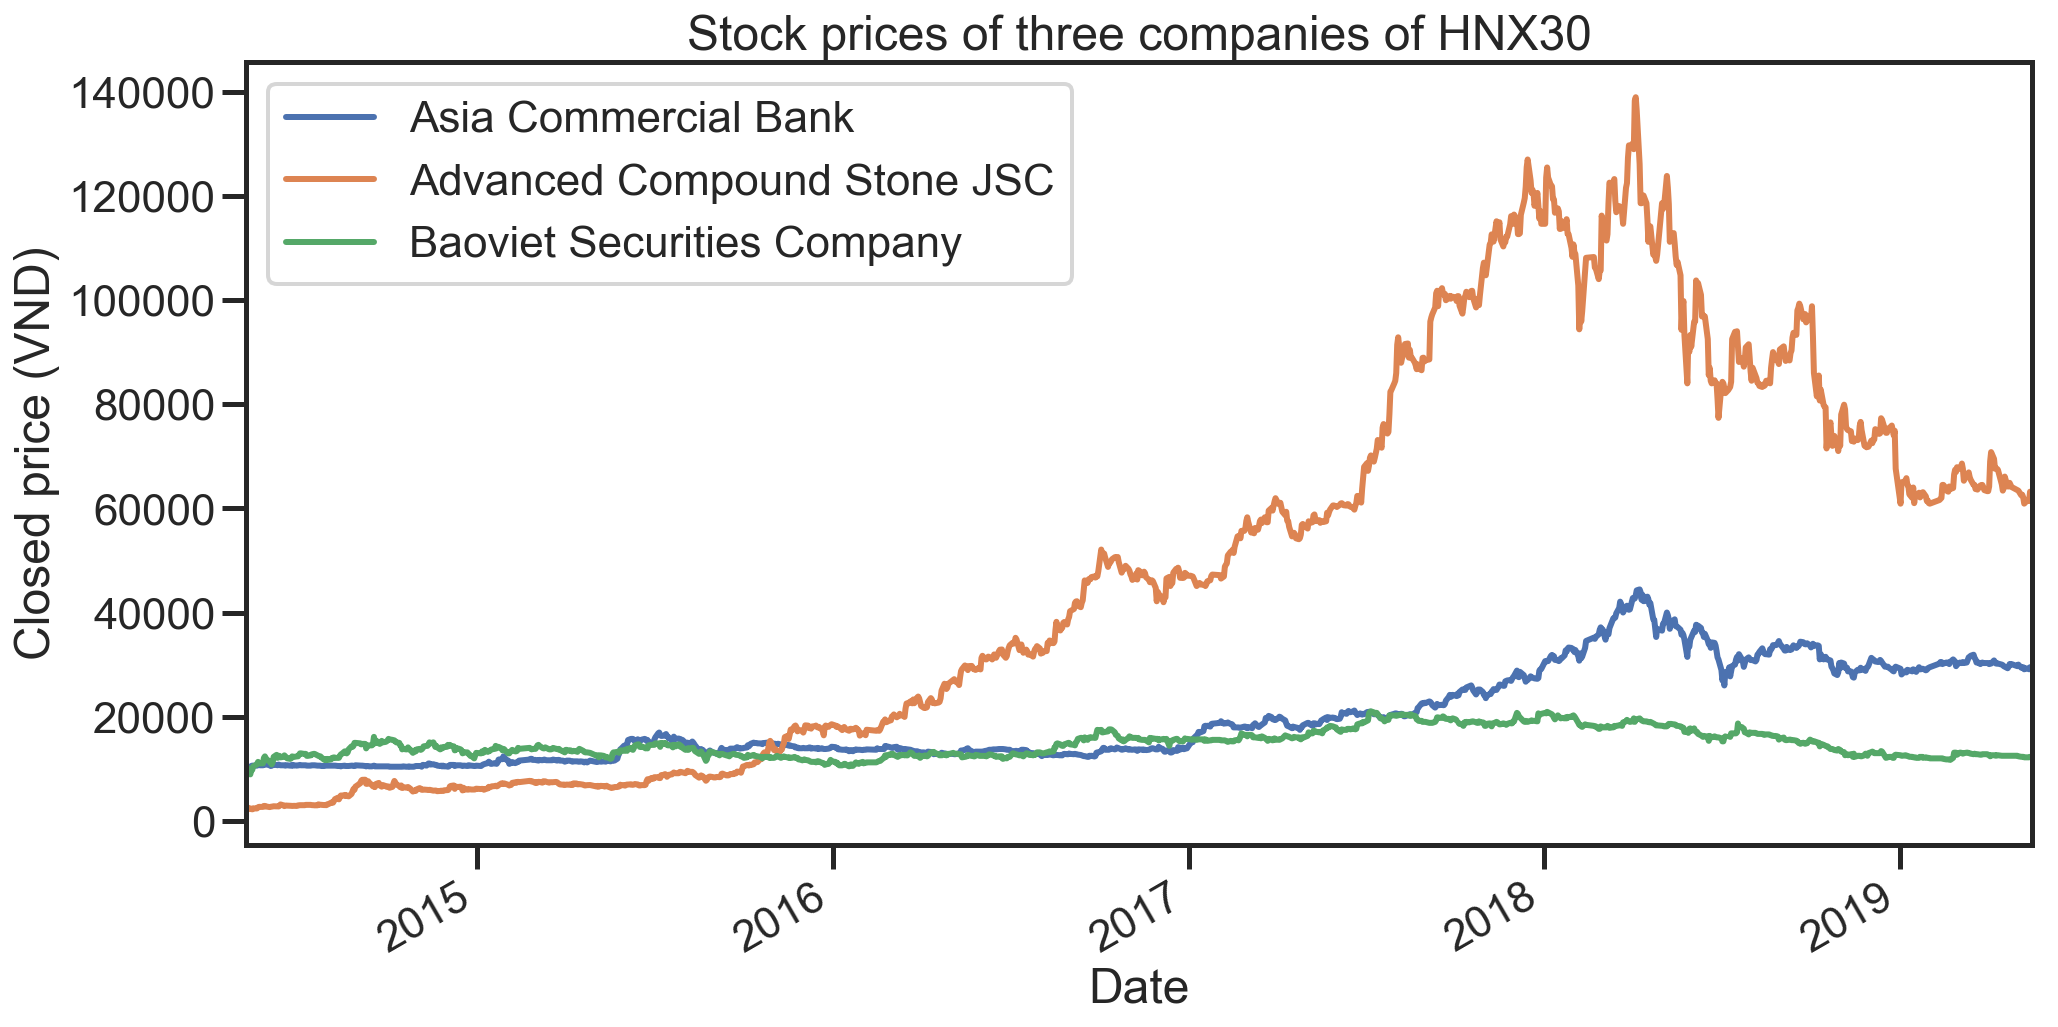

In [8]:
closed_price.plot(figsize=(16,8))
plt.ylabel('Closed price (VND)')
plt.xlabel('Date')
plt.title('Stock prices of three companies of HNX30')
plt.show()

## Plot ACF and PACF

In [9]:
from statsmodels.tsa.stattools import pacf, acf

def calculate_acf(time_series, lag=20, alpha=0.01):
    x = time_series.values
    acf_value, confint = acf(x, nlags=lag, alpha=alpha)
    confint_lower = confint[:, 0] - acf_value
    confint_upper = confint[:, 1] - acf_value
    return acf_value, confint_upper, confint_lower


def calculate_pacf(time_series, lag=20, alpha=0.01):
    x = time_series.values
    pacf_value, confint = pacf(x, nlags=lag, alpha=alpha)
    confint_lower = confint[:, 0] - pacf_value
    confint_upper = confint[:, 1] - pacf_value
    return pacf_value, confint_upper, confint_lower

In [10]:
acf_value, confint_upper, confint_lower = calculate_acf(closed_price['Asia Commercial Bank'])

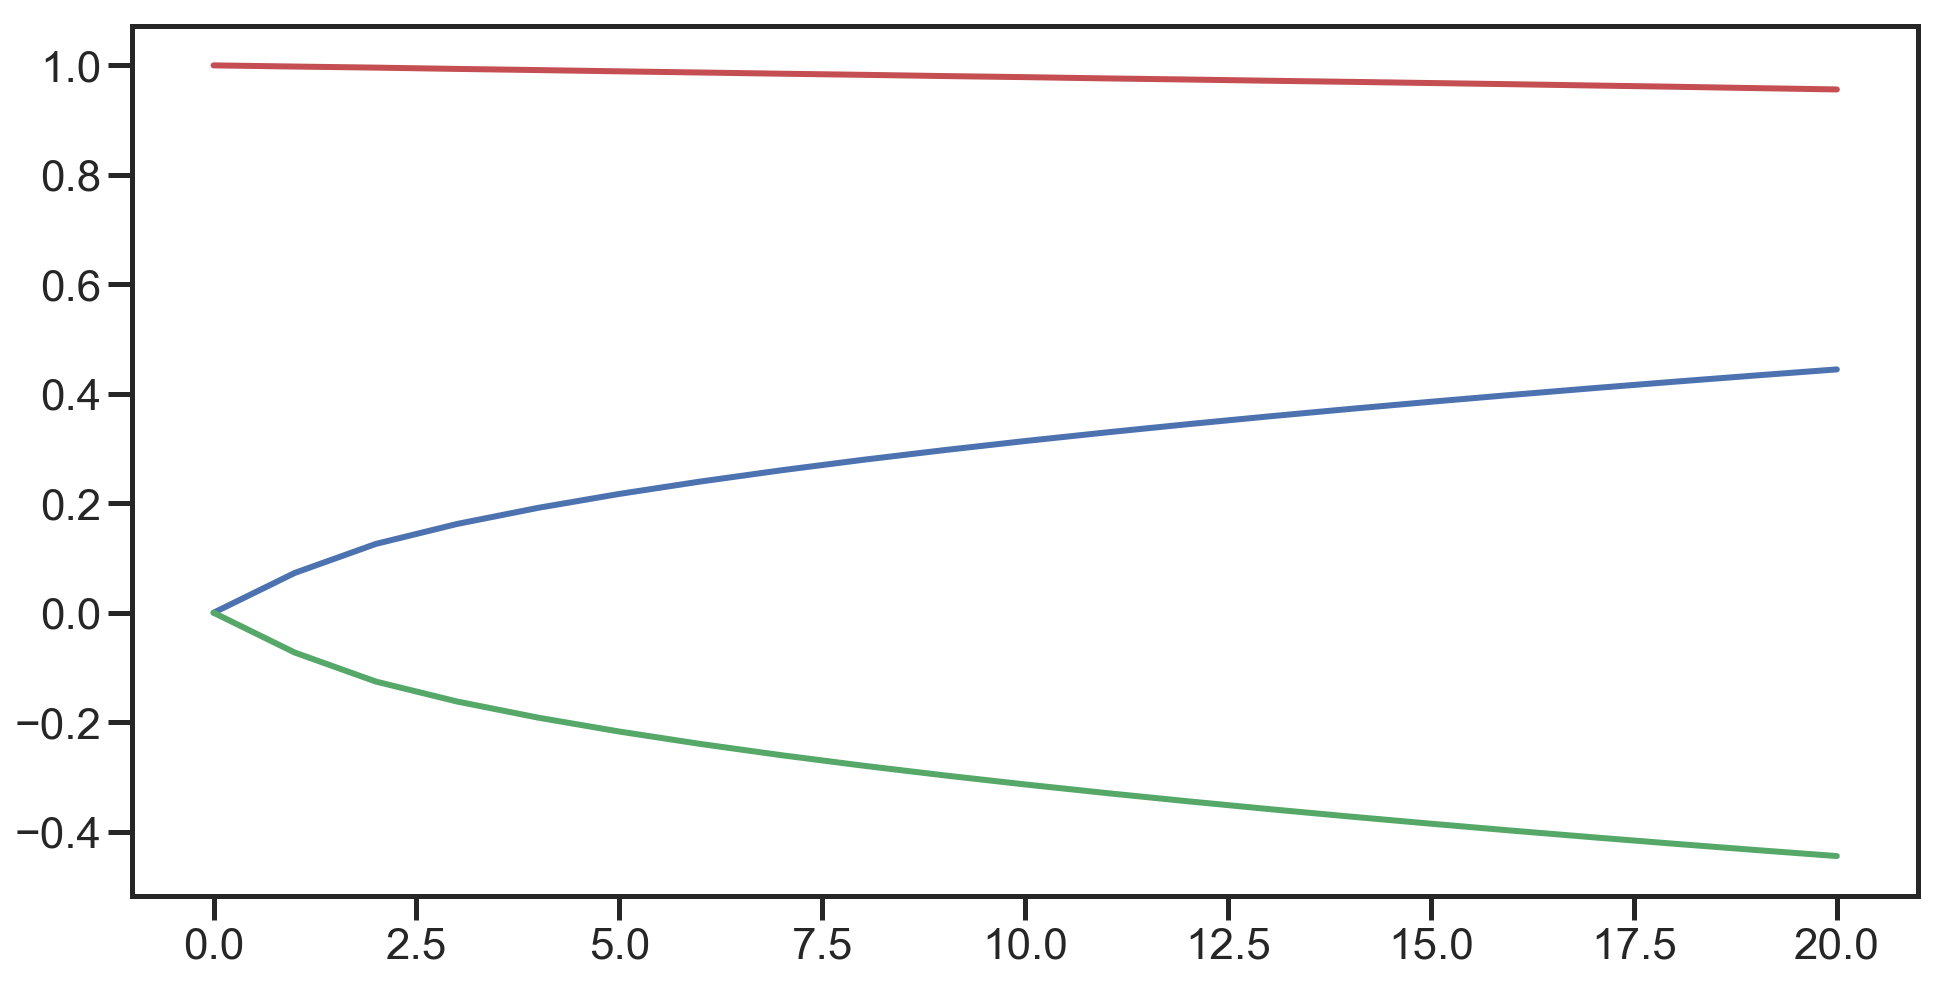

In [11]:
plt.figure(figsize=(16,8))
plt.plot(acf_value, color='r')
plt.plot(confint_upper, color='b')
plt.plot(confint_lower, color='g')
plt.show()

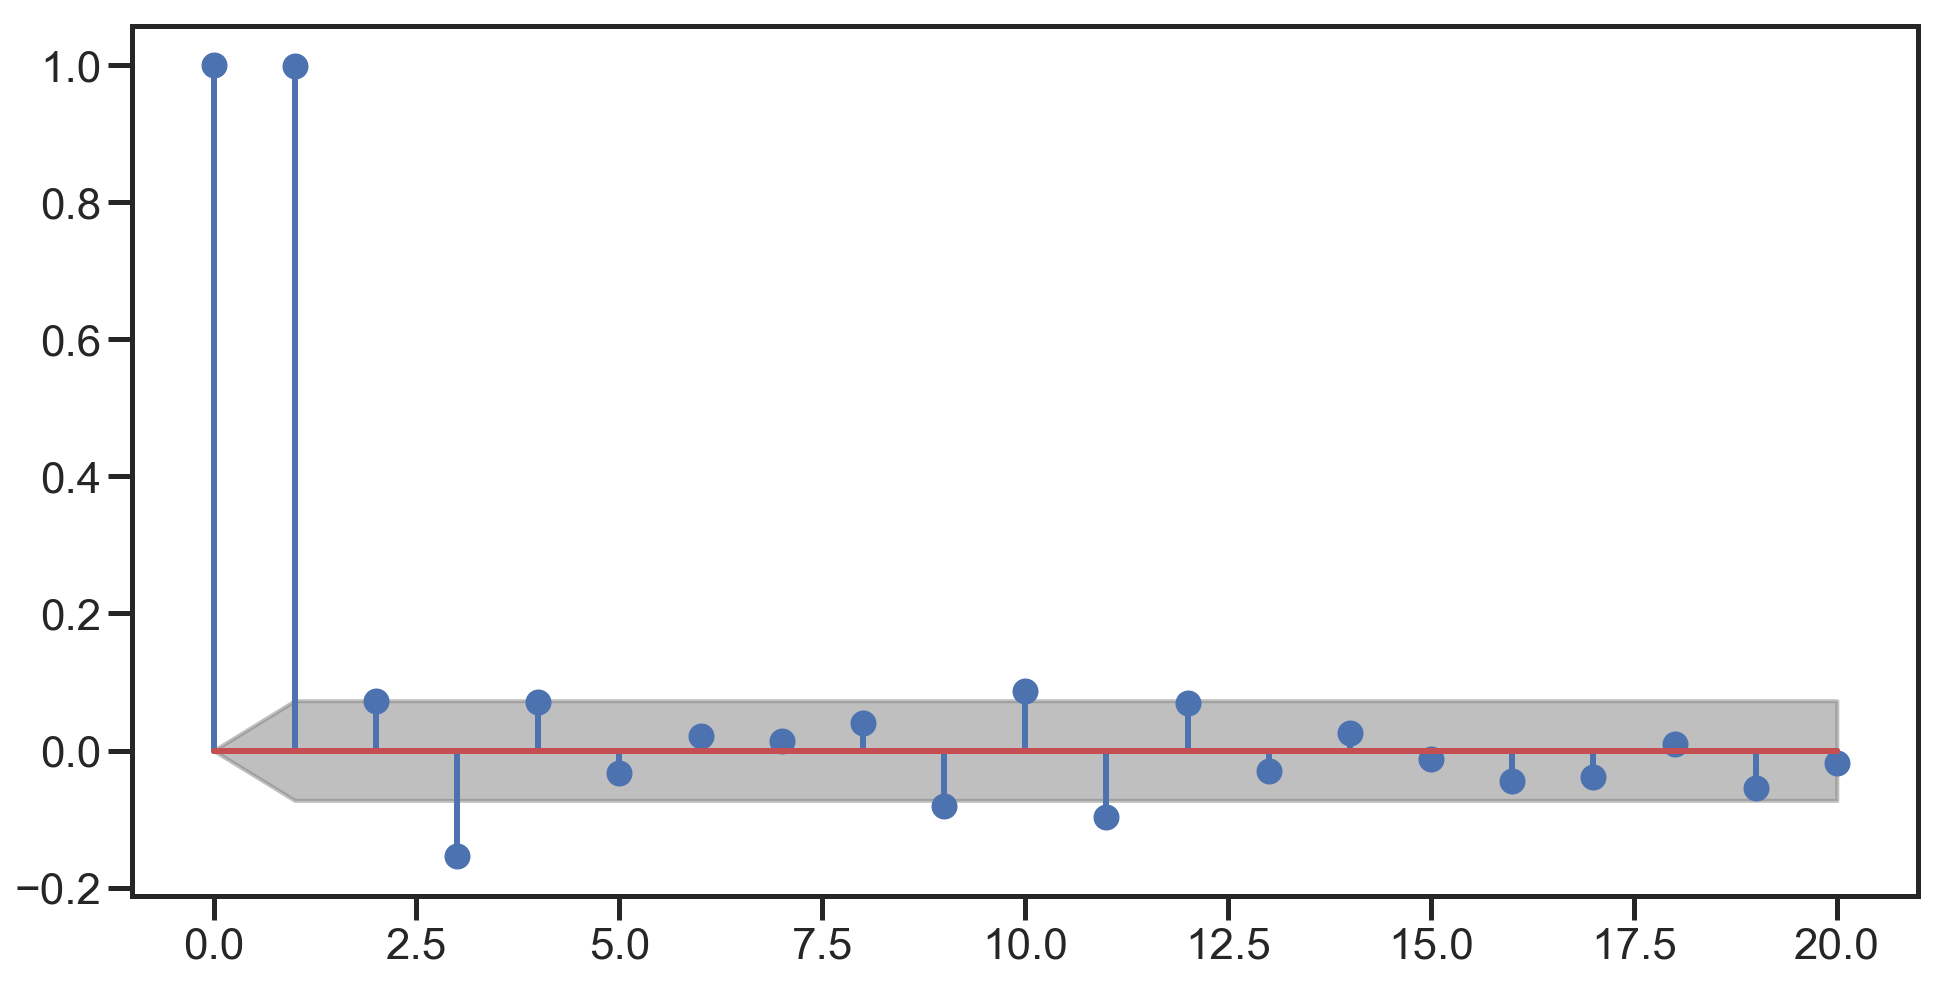

In [12]:
pacf_value, confint_upper, confint_lower = calculate_pacf(closed_price['Asia Commercial Bank'])

plt.figure(figsize=(16,8))
plt.stem(range(0,21), pacf_value)
# plt.plot(confint_upper, color='b')
# plt.plot(confint_lower, color='g')
plt.fill_between(x=range(0,21), y1=confint_upper, y2=confint_lower, color='grey', alpha=0.5)
plt.show()